# 🛒 E-Commerce Shipping Data: EDA

This dataset is provided by an *international e-commerce company selling electronic produts*.

They want to discover key insights from their customer database.

My notebook will focus on **exploratory data analysis (EDA)** in order to prepare for the use of **machine learning models** in a second part.

# Getting Started

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

In [2]:
# Load the data
data = pd.read_csv('../input/customer-analytics/Train.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# First Sightings

**Relevance of features for EDA: (0: none, 1: weak, 2: medium, 3: strong)**

These are my first guesses:

- **Unique ID:** will not be usefull - 0
- **Warehouse:** indicates from which bloc the product comes from - 2
- **Mode of Shipment:** Transportation vehicle - 3
- **Care Calls:** Number of enquiries - 1
- **Customer Rating:** Given rate - 3
- **Cost of Product:** Price - 3
- **Prior Purchases:** Customer regularity - 2
- **Product Importance:** Importance - 2
- **Gender:** Male or Female - 1
- **Discount:** In percentage - 2
- **Weight:** Package in grams - 2
- **Reached on Time:** 0: no delay, 1: delay - 3


In [3]:
# Drop ID
data = data.drop('ID', axis=1)

In [4]:
# Print some information about the data
print("Missing values:", data.isna().sum().sum())
print("Categorical features:", len(data.select_dtypes('object').columns))
print("Numerical features:", len(data.select_dtypes('number').columns))

Missing values: 0
Categorical features: 4
Numerical features: 7


# Correlation of Numerical Features 

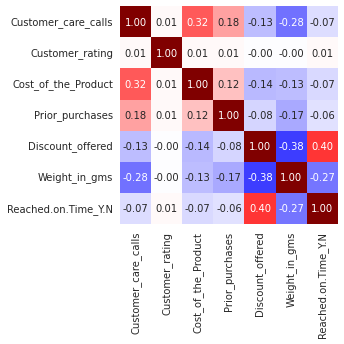

In [5]:
# Display the correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(data[data.select_dtypes('number').columns].corr(),
            square=True, cmap='seismic', cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

The Cutomer Rating does not seem correlated at all with other features.

# Feature Vizualisation

Let's visualize the feature repartition.

## - Categorical

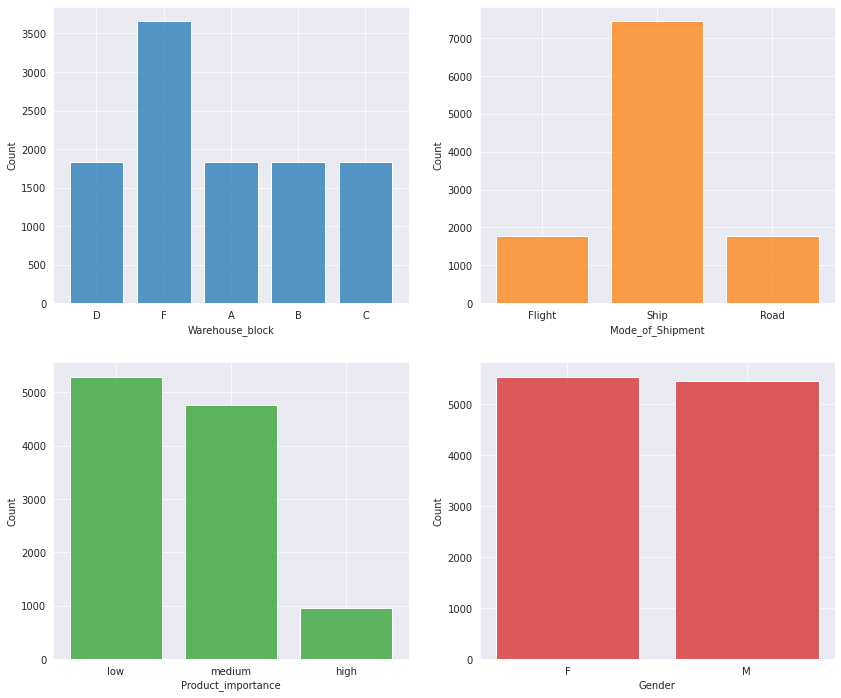

In [6]:
# Display class repartitions
plt.figure(figsize=(14, 12))

cat_features = data.select_dtypes('object').columns.values

for i, cat in enumerate(cat_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(data[cat], shrink=0.8, color=pal[i])
    
plt.show()

- **Warehouse:** Blocks *A, B, C, D* are equilibrated while block *F* is predominent (1/2 ratio).
- **Shipment:** *Flight* and *Road* have similar observations while *Ship* is predominent (1/4 ratio).
- **Importance:** There is a majority of *low* and *medium* importances and a minority of *high* importances.
- **Genders:** Both classes are balanced.

# - Numerical

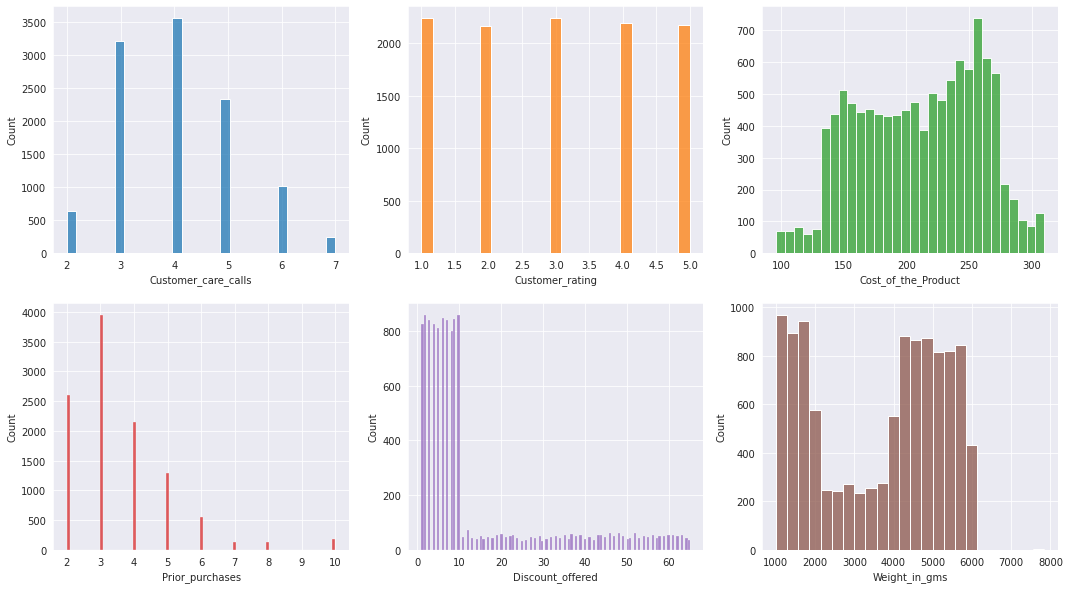

In [7]:
# Display value distributions
plt.figure(figsize=(18, 10))

num_features = data.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(data[num], color=pal[i])
    
plt.show()

- **Care Calls:** Sligh positive skewed normal distribution with mode at 4.
- **Customer Rating:** Uniform distribution.
- **Costs:** 2 picks: smallest around 150, highest around 250.
- **Prior Purchases:** Positive skewed normal distribution, mode at 3.
- **Discount offered:** Separated into 2 uniform distributions: 0 to 10 is predominent and then small amount from 10 to 65.
- **Weight:** 3 zones: high from 1000 to 2000 and from 4000 to 6000. Low from 2000 to 4000.

# Target Analysis

In [8]:
# Ratio of delayed (1) and not delayed orders (0)
data['Reached.on.Time_Y.N'].value_counts() / data['Reached.on.Time_Y.N'].count()

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64